In [5]:
import sys
sys.path.append('../..')

In [39]:
import sbi4abm.sbi
from sbi4abm.sbi import analysis, utils
from sbi4abm.utils import sampling, plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle

In [40]:
matplotlib.rc('text', usetex=True)
plt.rcParams.update({
  "text.usetex": False,
  "font.family": "serif"
})
plt.rcParams.update({
    'text.latex.preamble':r"\usepackage{amsmath}"+"\n"+r"\usepackage{bm}"
})

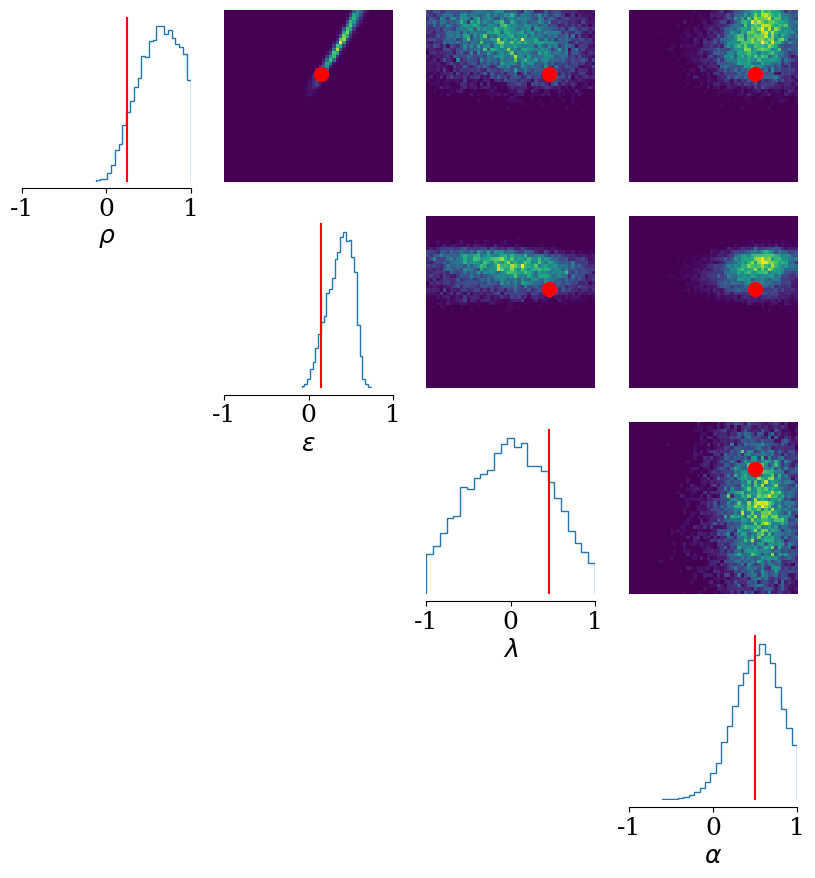

In [41]:
hop = np.loadtxt("../../exp_dir/1708021338.2990642/samples.txt")
# hop = np.loadtxt("../../exp_dir/1708076421.561745/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(hop, limits=[[-1,1], [-1,1], [-1,1], [-1,1]], points=[np.array([0.25, 0.15, 0.45, 0.5])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


In [42]:
file_name = "1708076421.561745"
with open(f"../../exp_dir/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

print(posterior)

Posterior conditional density p(θ|x) (amortized). Evaluates and samples by default at x=[[5.658412933349609, 7.794386863708496, 3.776506185531616, 1.4983195066452026, 0.2647950053215027]].

This DirectPosterior-object was obtained with a SNPE-class method using a flow.
It allows to .sample() and .log_prob() the posterior and wraps the output of the .net to avoid leakage into regions with 0 prior probability.


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([1000, 4])
torch.Size([1000])


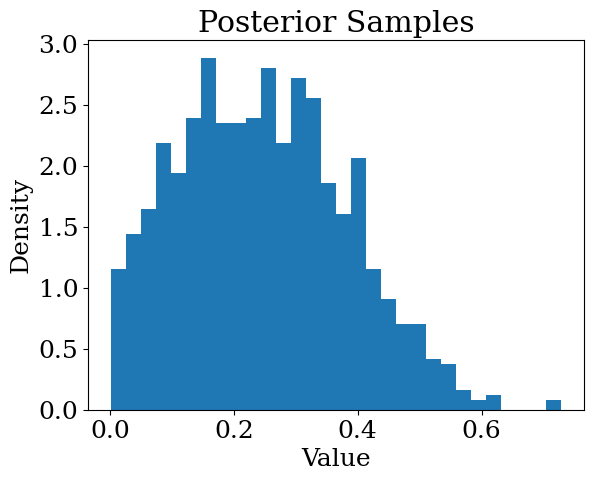

In [43]:
x = torch.tensor([10.225096881558523,
                14.164716771097027,
                7.1184287049926915,
                1.4364261138679228,
                0.14048044047959973])

# Assume `posterior` is your DirectPosterior object and `x` is your data
samples = posterior.sample((1000,), x)  # Generate 1000 samples from the posterior
log_probs = posterior.log_prob(samples, x)  # Compute the log probability of the samples

print(samples.shape)
print(log_probs.shape)

# Convert the tensor to a numpy array
samples_np = samples.numpy()

# Plot the first dimension of the samples
plt.hist(samples_np[:, 0], bins=30, density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Posterior Samples')
plt.show()

/Users/pedrosousa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


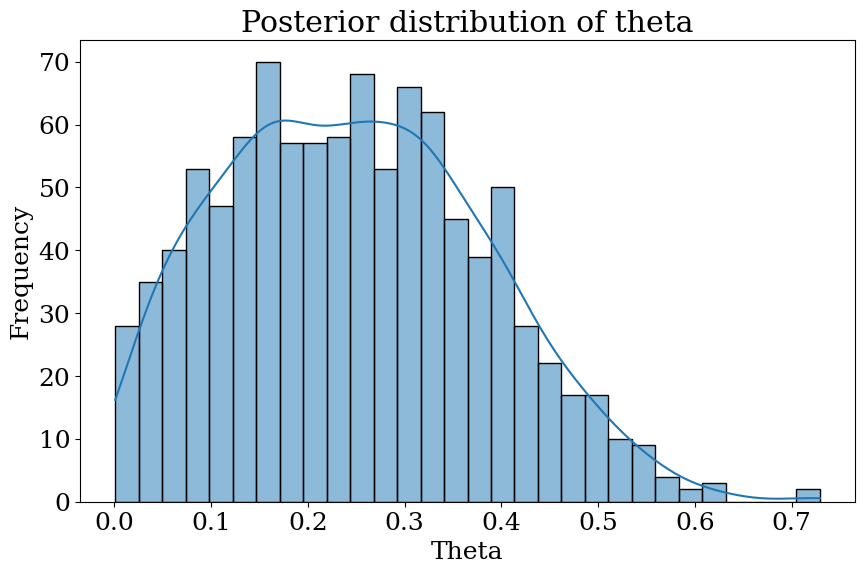

In [44]:
import seaborn as sns

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(samples_np[:, 0], bins=30, kde=True)
plt.title('Posterior distribution of theta')
plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.show()

In [34]:
import torch.optim as optim

# Initialize theta at some reasonable starting point
theta_map = torch.zeros(4, requires_grad=True)

# Define optimizer
optimizer = optim.Adam([theta_map], lr=0.01)

print(posterior.log_prob(theta_map, x))

# Optimization loop
for step in range(1000):
    optimizer.zero_grad()
    log_prob = posterior.log_prob(theta_map, x)
    (-log_prob).backward()  # We want to maximize log_prob, so minimize -log_prob
    optimizer.step()

print('MAP estimate of theta:', theta_map.detach().numpy())

tensor([-2.4873])


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn